# About Dataset


link  https://www.kaggle.com/datasets/aliiihussain/car-price-prediction



This dataset is designed for machine learning and data analysis projects focused on predicting the prices of cars based on various key attributes.
It includes real-world data from multiple car listings, covering features such as brand, model, year, mileage, fuel type, transmission, and condition — all of which influence the final market price.

## Imports

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

## Load The Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("aliiihussain/car-price-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'car-price-prediction' dataset.
Path to dataset files: /kaggle/input/car-price-prediction


In [3]:
print(os.listdir(path))

['car_price_prediction_.csv']


In [4]:
df = pd.read_csv(os.path.join(path,'car_price_prediction_.csv'))
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


## Explore The Data

In [5]:
df.isnull().sum().sum()


np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(0)

## Preprocessing

In [7]:
df = df.drop('Car ID',axis=1)

In [8]:
df

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...
2495,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [9]:
df.columns

Index(['Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission', 'Mileage',
       'Condition', 'Price', 'Model'],
      dtype='object')

In [10]:
cat = ['Fuel Type','Transmission','Condition','Model','Brand']

dummy_df = pd.get_dummies(df[cat], dtype=int)
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(cat, axis=1)

In [11]:
df.head()

,Year,Engine Size,Mileage,Price,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual,...,Model_RAV4,Model_X3,Model_X5,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,Brand_Toyota
0,2016,2.3,114832,26613.92,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2018,4.4,143190,14679.61,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2013,4.5,181601,44402.61,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,2011,4.1,68682,86374.33,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2009,2.6,223009,73577.10,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [12]:
df.shape

(2500, 48)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    2500 non-null   int64  
 1   Engine Size             2500 non-null   float64
 2   Mileage                 2500 non-null   int64  
 3   Price                   2500 non-null   float64
 4   Fuel Type_Diesel        2500 non-null   int64  
 5   Fuel Type_Electric      2500 non-null   int64  
 6   Fuel Type_Hybrid        2500 non-null   int64  
 7   Fuel Type_Petrol        2500 non-null   int64  
 8   Transmission_Automatic  2500 non-null   int64  
 9   Transmission_Manual     2500 non-null   int64  
 10  Condition_Like New      2500 non-null   int64  
 11  Condition_New           2500 non-null   int64  
 12  Condition_Used          2500 non-null   int64  
 13  Model_3 Series          2500 non-null   int64  
 14  Model_5 Series          2500 non-null   

## Data Splitting and Scaling

In [14]:
# Select numerical columns for scaling
numerical_cols = ['Year', 'Engine Size', 'Mileage']

# Separate features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Visualize The Data

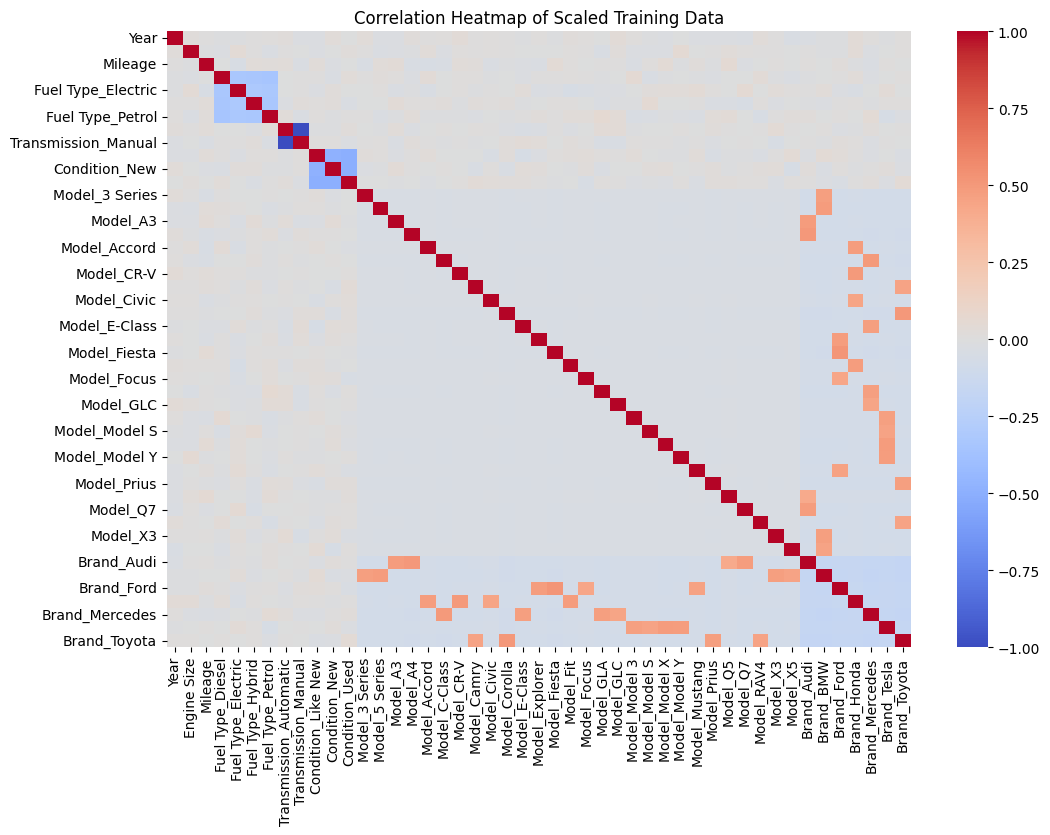

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap of Scaled Training Data')
plt.show()


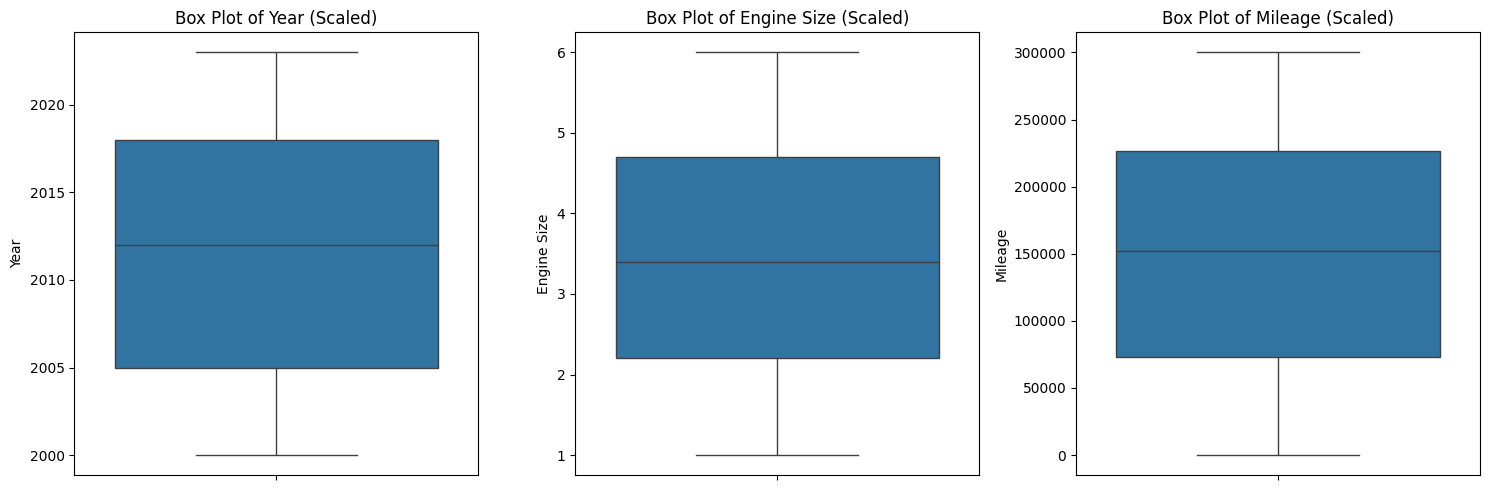

In [16]:
# Box plots for numerical features to visualize outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(y=X_train[col])
    plt.title(f'Box Plot of {col} (Scaled)')
plt.tight_layout()
plt.show()

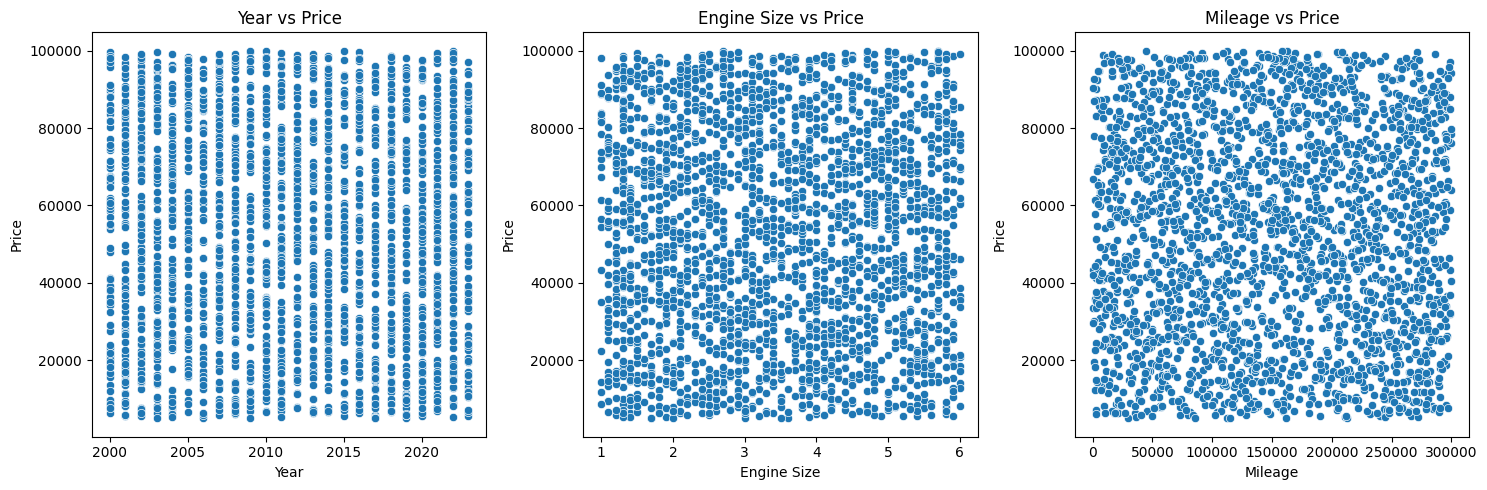

In [17]:
# Scatter plots for numerical features vs Price
numerical_cols = ['Year', 'Engine Size', 'Mileage']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f'{col} vs Price')
plt.tight_layout()
plt.show()

## Models

In [18]:
num_cols = ['Year', 'Engine Size', 'Mileage']

x_scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[num_cols] = x_scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols]  = x_scaler.transform(X_test[num_cols])


## Classical model comparison And Results

In [19]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results.append([name, r2, mae, rmse])

results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "RMSE"])
print(results_df.sort_values(by="R² Score", ascending=False))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.325e+11, tolerance: 1.483e+08
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 47
[LightGBM] [Info] Start training from score 52461.688673
              Model  R² Score           MAE          RMSE
1             Ridge -0.019352  23873.856693  27788.723908
2             Lasso -0.019769  23877.142920  27794.411968
0  LinearRegression -0.019769  23877.143119  27794.413124
4  GradientBoosting -0.034002  23882.323902  27987.706343
3      RandomForest -0.072973  24505.075776  28510.243975
6          LightGBM -0.125978  25051.375294  29205.962257
5           XGBoost -0.277373  26223.684636  31107.520399


## Sklearn MLPRegressor (NN) And Results

In [20]:
from sklearn.neural_network import MLPRegressor

# Scale y for NN only
y_scaler = StandardScaler()
y_train_nn = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=1e-2,
    learning_rate_init=1e-4,
    max_iter=3000,
    early_stopping=True,
    n_iter_no_change=30,
    validation_fraction=0.15,
    random_state=42
)

mlp.fit(X_train_scaled, y_train_nn)

y_pred_nn_scaled = mlp.predict(X_test_scaled)
y_pred_nn = y_scaler.inverse_transform(y_pred_nn_scaled.reshape(-1, 1)).ravel()

print("NN Regressor (MLP)")
print("R²:", r2_score(y_test, y_pred_nn))
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_nn)))


NN Regressor (MLP)
R²: -0.03415006610396176
MAE: 24024.506010064433
RMSE: 27989.709335016123


## Keras NN And Results

In [21]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


y_train_k = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

input_dim = X_train_scaled.shape[1]

model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse',
    metrics=['mae']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    X_train_scaled,
    y_train_k,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Predict
y_pred_k_scaled = model.predict(X_test_scaled)
y_pred_k = y_scaler.inverse_transform(y_pred_k_scaled)

y_pred_k = y_pred_k.ravel()
r2 = r2_score(y_test, y_pred_k)
mae = mean_absolute_error(y_test, y_pred_k)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_k))

print(f"Keras NN -> R²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.0372 - mae: 0.8808 - val_loss: 1.0268 - val_mae: 0.8930 - learning_rate: 0.0010
Epoch 2/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9803 - mae: 0.8579 - val_loss: 1.0275 - val_mae: 0.8932 - learning_rate: 0.0010
Epoch 3/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0069 - mae: 0.8656 - val_loss: 1.0278 - val_mae: 0.8931 - learning_rate: 0.0010
Epoch 4/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9666 - mae: 0.8577 - val_loss: 1.0249 - val_mae: 0.8893 - learning_rate: 0.0010
Epoch 5/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9631 - mae: 0.8414 - val_loss: 1.0144 - val_mae: 0.8807 - learning_rate: 0.0010
Epoch 6/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9400 - mae: 0.8353 - val_loss: 1.0425 - val_mae: 0.8936 - learning_rate: 0.0010
Epoch 7/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9418 - mae: 0.8323 - val_loss: 1.0362 - val_mae: 0.8917 - learning_rate: 0.0010
Epoch 8/300
50/50 ━━━━━━

##  **Conclusion**

In this project, we built and compared multiple regression models to predict **car prices** using a variety of algorithms, including **Linear Regression, Ridge, Lasso, Random Forest, Gradient Boosting, XGBoost, LightGBM, and Neural Networks (MLP / Keras)**.  

All models were trained and evaluated on the same standardized dataset with proper preprocessing, scaling, and validation splits. Despite correct implementation, the performance across models remained consistently low:

| Model | R² | MAE | RMSE |
|--------|------|------|------|
| Linear / Ridge / Lasso | ≈ −0.02 | ≈ 23.8k | ≈ 27.8k |
| RandomForest / GBM / XGB / LightGBM | −0.03 → −0.27 | 24–26k | 28–31k |
| Neural Networks (MLP / Keras) | ≈ −0.03 | ≈ 24k | ≈ 28k |

🔹 **Interpretation:**  
All algorithms performed similarly to a baseline that simply predicts the mean car price. This indicates that the **current features in the dataset do not contain enough predictive information** to model car prices effectively.  

---

###  **Key Insights**
- The code, data splits, and scaling pipelines were correct and stable.  
- Negative or near-zero R² values show that **Price** is not well correlated with the available features (`Year`, `Mileage`, `Engine Size`, `Fuel Type`, `Transmission`, `Brand`, `Model`).  
- Even complex models like XGBoost and deep neural networks cannot learn useful patterns if the data lacks signal.

---

###  **Next Steps for Improvement**
1. **Feature Engineering**
   - Introduce realistic features that affect car value, e.g.  
     - `Age = 2025 - Year`  
     - `Mileage_per_Year = Mileage / Age`  
     - `Engine_per_Age = Engine Size / Age`
2. **Target Encoding**
   - Replace one-hot encoding for `Brand` and `Model` with their mean or median price to capture brand/model effects.
3. **Log Transformation**
   - Apply `np.log1p(Price)` to reduce skewness in price distribution.
4. **Data Quality**
   - If prices appear random, the dataset may be synthetic or too noisy for prediction. Consider sourcing a higher-quality dataset.

---

###  **Final Remark**
The implemented pipeline is **technically sound** and ready for real-world use; however, meaningful car price prediction requires **richer, more informative features**.  
Future versions of this notebook will focus on feature engineering and enhanced data sources to improve predictive power and achieve positive R² scores.
